In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skbio import diversity
from skbio.stats import ordination

ModuleNotFoundError: No module named 'pandas'

In [2]:
!pip list

/bin/bash: /home/kpotoh/valerik/env_biom/bin/pip: /home/kpotoh/valerik/data/eugene/iqtree/env_biom/bin/python3.9: bad interpreter: No such file or directory


In [73]:
otus = pd.read_csv("../data/eugene/otusy_otfiltrovannye.csv", sep=";", comment="#").drop_duplicates()
otus

,sample_name,cluster_id,cluster_acc,n_seqs,avg_seq_ident,similarity,sequence,reference,classifications,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,v220,23508,M01197:116:000000000-DHGG8:1:1101:10037:13136,66,99.42,99.80,TACGGGGGGAGCAAGCGTTGTTCGGATTTACTGGGCGTAAAGGGCG...,KF037415.1.1527,ncbi|138.1|77133|root,cellular organisms,...,Pyrinomonadales,Pyrinomonadaceae,RB41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,v220,24545,M01197:116:000000000-DHGG8:1:1101:16354:7724,4,100.00,100.00,TACGGGGGGAGCAAGCGTTGTTCGGATTTACTGGGCGTAAAGGGCG...,KY190395.1.1482,ncbi|138.1|77133|root,cellular organisms,...,Pyrinomonadales,Pyrinomonadaceae,RB41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,v220,27585,M01197:116:000000000-DHGG8:1:1102:12666:6930,3,98.60,99.80,TACGGGGGGAGCAAGCGTTGTTCGGATTTACTGGGCGTAAAGGGCG...,HM224426.1.1489,ncbi|138.1|77133|root,cellular organisms,...,Pyrinomonadales,Pyrinomonadaceae,RB41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,v225,57242,M01197:116:000000000-DHGG8:1:1102:14470:26289,1,100.00,97.01,TACGGGGGGAGCAAGCGTTGTTCGGATTTACTGGGCGTAAAGGGCG...,JN616042.1.1383,ncbi|138.1|77133|root,cellular organisms,...,Pyrinomonadales,Pyrinomonadaceae,RB41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,v225,59239,M01197:116:000000000-DHGG8:1:1102:22752:11318,2,100.00,100.00,TACGGGGGGAGCAAGCGTTGTTCGGATTTACTGGGCGTAAAGGGCG...,JF429059.1.1529,ncbi|138.1|77133|root,cellular organisms,...,Pyrinomonadales,Pyrinomonadaceae,RB41,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2073,v219,22551,M01197:116:000000000-DHGG8:1:1102:18468:7619,1,100.00,100.00,TACGAAGGTCCCAAGCGTTGTTCGGAATCACTGGGCGTAAAGGGAG...,KF799162.1.1415,ncbi|138.1|77133|root,cellular organisms,...,Verrucomicrobiales,Rubritaleaceae,Luteolibacter,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2074,v223,38720,M01197:116:000000000-DHGG8:1:1102:7732:18035,1,100.00,95.50,TACGAAGGTCCCAAGCGTTGTTCGGAATCACTGGGCGTAAAGGGAG...,FJ716028.1.1413,ncbi|138.1|77133|root,cellular organisms,...,Verrucomicrobiales,Rubritaleaceae,Luteolibacter,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2075,v225,53935,M01197:116:000000000-DHGG8:1:1101:22808:7682,3,100.00,100.00,TACGAAGGTCCCGAGCGTTGTTCGGAATCACTGGGCGTAAAGGGAG...,EF471653.1.1492,ncbi|138.1|156588|root,cellular organisms,...,Verrucomicrobiales,Rubritaleaceae,Luteolibacter,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2076,v229,80688,M01197:116:000000000-DHGG8:1:1102:6039:20320,1,100.00,99.80,TACGAAGGTCCCGAGCGTTGTTCGGAATCACTGGGCGTAAAGGGAG...,JQ346775.1.1379,ncbi|138.1|156588|root,cellular organisms,...,Verrucomicrobiales,Rubritaleaceae,Luteolibacter,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Distributuions

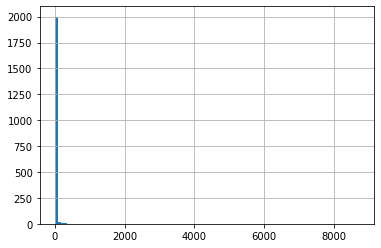

In [30]:
otus.n_seqs.hist(bins=100);

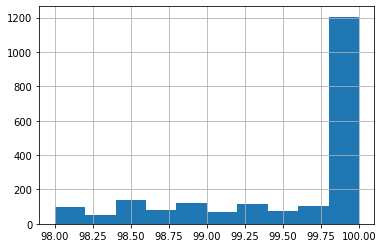

In [31]:
otus.avg_seq_ident.hist();

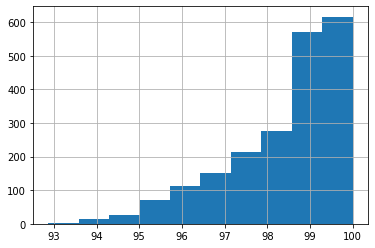

In [32]:
otus.similarity.hist();

### Taxa

In [74]:
otus = otus.rename(columns={"Unnamed: 13": "domain", "Unnamed: 14": "phylum", "Unnamed: 15": "class", "Unnamed: 16": "order", "Unnamed: 17": "family", "Unnamed: 18": "genus"})
otus = otus.drop([c for c in otus.columns if c.startswith("Unnamed")], axis=1)
otus["domain"] = "Bacteria"

In [75]:
otus.head()

,sample_name,cluster_id,cluster_acc,n_seqs,avg_seq_ident,similarity,sequence,reference,classifications,domain,phylum,class,order,family,genus
0,v220,23508,M01197:116:000000000-DHGG8:1:1101:10037:13136,66,99.42,99.80,TACGGGGGGAGCAAGCGTTGTTCGGATTTACTGGGCGTAAAGGGCG...,KF037415.1.1527,ncbi|138.1|77133|root,Bacteria,Acidobacteriota,Blastocatellia,Pyrinomonadales,Pyrinomonadaceae,RB41
1,v220,24545,M01197:116:000000000-DHGG8:1:1101:16354:7724,4,100.00,100.00,TACGGGGGGAGCAAGCGTTGTTCGGATTTACTGGGCGTAAAGGGCG...,KY190395.1.1482,ncbi|138.1|77133|root,Bacteria,Acidobacteriota,Blastocatellia,Pyrinomonadales,Pyrinomonadaceae,RB41
2,v220,27585,M01197:116:000000000-DHGG8:1:1102:12666:6930,3,98.60,99.80,TACGGGGGGAGCAAGCGTTGTTCGGATTTACTGGGCGTAAAGGGCG...,HM224426.1.1489,ncbi|138.1|77133|root,Bacteria,Acidobacteriota,Blastocatellia,Pyrinomonadales,Pyrinomonadaceae,RB41
3,v225,57242,M01197:116:000000000-DHGG8:1:1102:14470:26289,1,100.00,97.01,TACGGGGGGAGCAAGCGTTGTTCGGATTTACTGGGCGTAAAGGGCG...,JN616042.1.1383,ncbi|138.1|77133|root,Bacteria,Acidobacteriota,Blastocatellia,Pyrinomonadales,Pyrinomonadaceae,RB41
4,v225,59239,M01197:116:000000000-DHGG8:1:1102:22752:11318,2,100.00,100.00,TACGGGGGGAGCAAGCGTTGTTCGGATTTACTGGGCGTAAAGGGCG...,JF429059.1.1529,ncbi|138.1|77133|root,Bacteria,Acidobacteriota,Blastocatellia,Pyrinomonadales,Pyrinomonadaceae,RB41


In [76]:
cols_taxa = ["domain", "phylum", "class", "order", "family", "genus"]

taxonomy = otus.iloc[:, 6:].drop(["reference", "classifications"], axis=1).drop_duplicates(subset=cols_taxa)
taxonomy["OTU"] = [f"OTU_{x}" for x in range(1, len(taxonomy)+1)]
print(taxonomy.shape)
taxonomy.head()

(51, 8)


,sequence,domain,phylum,class,order,family,genus,OTU
0,TACGGGGGGAGCAAGCGTTGTTCGGATTTACTGGGCGTAAAGGGCG...,Bacteria,Acidobacteriota,Blastocatellia,Pyrinomonadales,Pyrinomonadaceae,RB41,OTU_1
5,TACGGGGGGGGCAAGCGTTGTTCGGAATTACTGGGCGTAAAGGGCT...,Bacteria,Acidobacteriota,Vicinamibacteria,Vicinamibacterales,uncultured,NaN,OTU_2
37,CACGTAGGGTGCGAGCGTTGTCCGGAATTATTGGGCGTAAAGAGCT...,Bacteria,Actinobacteriota,Actinobacteria,Frankiales,Acidothermaceae,Acidothermus,OTU_3
45,TACGTAGGGTGCGAGCGTTGTCCGGAATTATTGGGCGTAAAGAGCT...,Bacteria,Actinobacteriota,Actinobacteria,Micrococcales,Intrasporangiaceae,Ornithinibacter,OTU_4
50,TACGTAGGGTGCGAGCGTTATCCGGAATTATTGGGCGTAAAGAGCT...,Bacteria,Actinobacteriota,Actinobacteria,Micrococcales,Micrococcaceae,Micrococcus,OTU_5


In [65]:
# write fasta
seqs = taxonomy[["OTU", "sequence"]]
seqs["OTU"] = seqs["OTU"].apply(lambda x: ">" + x)
seqs.to_csv("../data/eugene/sequences_otu.fasta", index=None, header=None, sep="\n")

/tmp/ipykernel_5760/4218383405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seqs["OTU"] = seqs["OTU"].apply(lambda x: ">" + x)


In [77]:
otus = otus.merge(taxonomy.drop("sequence", axis=1), on=cols_taxa, )

In [79]:
valeric = pd.read_csv("../data/processed/comp_full.csv")
valeric

,2cm Gotland,20cm Gotland,40cm Gotland,80cm Gotland,120cm Gotland,145cm Gotland,185cm Gotland,220cm Gotland,270cm Gotland,2cm Fin,...,150cm Fin,190cm Fin,domain,phylum,class,order,family,genus,sequence,OTU
0,10.46120,1.1149,1.00465,0.54855,0.29410,0.91300,1.27650,0.89165,1.10160,2.25905,...,2.93200,14.38855,Bacteria,Actinobacteriota,Actinobacteria,Corynebacteriales,Mycobacteriaceae,Mycobacterium,TACGTAGGGTGCGAGCGTTGTCCAGAATTACTGGGCGTAAAGAGCT...,OTU_4
1,3.50275,0.4323,0.23410,0.23175,0.11385,0.23995,0.38340,0.37140,0.16495,0.37970,...,0.25725,1.48010,Bacteria,Actinobacteriota,Thermoleophilia,Solirubrobacterales,Solirubrobacteraceae,Conexibacter,TACGTAGGGTACAAGCGTTGTCCGGAATCATTGGGCGTAAAGAGCG...,OTU_16
2,4.32900,15.8703,12.43845,16.66055,1.42445,2.88385,2.40605,16.13270,5.03310,3.04790,...,2.81250,2.87730,Bacteria,Chloroflexi,Anaerolineae,Anaerolineales,Anaerolineaceae,uncultured,CACGTAGGATCCGAGCGTTATCCGAATTTACTGGGCGTAAAGCGCG...,OTU_2
3,3.19500,2.7759,1.50360,2.15655,0.79220,0.38665,0.31675,2.93155,0.42755,0.47560,...,0.59005,1.31790,Bacteria,Desulfobacterota,Desulfobacteria,Desulfobacterales,Desulfosarcinaceae,SEEP-SRB1,ATACGGAGGGTGCAAGCGTTATTCGGATTTATTGGGCGTAAAGGGC...,OTU_26
4,2.78275,1.7747,3.42070,0.80630,0.64980,1.71630,3.14345,1.94490,2.89585,1.75310,...,4.98280,4.42205,Bacteria,Actinobacteriota,Thermoleophilia,Solirubrobacterales,67-14,NaN,TACGTAGGGGGCAAGCGTTGTCCGGAATCATTGGGCGTAAAGCGCG...,OTU_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220,0.00000,0.0114,0.00000,0.00000,0.00000,0.00920,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,Bacteria,Verrucomicrobiota,Verrucomicrobiae,S-BQ2-57 soil group,NaN,NaN,TACGGAGACGGCAAGCGTTGCTCGGAATCATTGGGCGTAAAGGGTC...,OTU_737
1221,0.00560,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Verrucomicrobiales,Rubritaleaceae,Persicirhabdus,TACGAAGGTCCCGAGCGTTATTCGGAATCACTGGGCGTAAAAAGTA...,OTU_794
1222,0.00560,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Verrucomicrobiales,Verrucomicrobiaceae,uncultured,TACAGAGGTCTCAAGCGTTGTTCGGAATCACTGGGCGTAAAGGGTG...,OTU_620
1223,0.00000,0.0000,0.00000,0.00000,0.01850,0.00920,0.00790,0.01360,0.00000,0.01260,...,0.00625,0.00000,Bacteria,WS4,NaN,NaN,NaN,NaN,GACGGAGGGGGCAAGCGTTGTCCGGAATTACTGGGCGTAAAGGGCG...,OTU_671


In [105]:
valeric.iloc[:, :17].sum(axis=0)

2cm Gotland       97.08260
20cm Gotland      97.20660
40cm Gotland      97.36770
80cm Gotland      96.60005
120cm Gotland     97.12750
145cm Gotland     96.97720
185cm Gotland     98.19600
220cm Gotland     98.03135
270cm Gotland     97.30945
2cm Fin           99.39805
10cm Fin          97.23190
20cm Fin          98.31945
40cm Fin          95.71295
80cm Fin          98.90775
110cm Fin         98.33660
150cm Fin         99.47820
190cm Fin         99.02985
dtype: float64

In [111]:
comp = otus.groupby(["OTU", "sample_name"]).n_seqs.sum().unstack().fillna(0)
comp = (comp / comp.sum(axis=0)).reset_index()
comp.head()

sample_name,OTU,v219,v220,v223,v224,v225,v227,v229
0,OTU_1,0.000000,0.032329,0.000000,0.000000,0.000991,0.000000,0.000000
1,OTU_10,0.009655,0.009743,0.040969,0.000600,0.013214,0.000142,0.000099
2,OTU_11,0.000000,0.101860,0.000202,0.000000,0.000330,0.000000,0.000099
3,OTU_12,0.001379,0.001329,0.000202,0.000000,0.000330,0.000000,0.000000
4,OTU_13,0.000000,0.001329,0.007871,0.042456,0.017839,0.007524,0.000494


In [114]:
comp.merge(taxonomy.drop("sequence", axis=1), on="OTU").to_csv("../data/eugene/comp_full.csv", index=False)

## Beta diversity

In [ ]:
with open("../data/processed/phylo.treefile.rooted") as fin:
    tree = skbio.TreeNode.read(StringIO(fin.read()))

In [ ]:
metrics = ["braycurtis", "unweighted_unifrac", "weighted_unifrac"]
metric = metrics[0]

if "unifrac" in metric:
    dm = diversity.beta_diversity(metric, comp_otu, comp_otu.index, otu_ids=otu_names, tree=tree)
else:
    dm = diversity.beta_diversity(metric, comp_otu, comp_otu.index)
    
fig = dm.plot("plasma", f"Beta diversity analisys, {metric}")
fig.set_size_inches((12, 10))
plt.savefig(f"../figures/beta_{metric}.png")